In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
all_metrics = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_GSE/L2_by_lossdiff/LR_classifiers_all/LR_metrics_loss_diff_l2.csv', 
                          index_col=0)
# filter out irrelevant celltypes
irrelevant = ['Doublet', 'Eryth', 'Platelet']
all_metrics = all_metrics.drop(irrelevant, axis=0)

print(all_metrics.shape)
all_metrics.head()

(28, 7)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.999487,0.000000,0.000000,0.000000,0.939387,0.009072,-0.000109
B_intermediate,0.990424,0.751313,0.545033,0.630310,0.992941,0.707194,0.634597
B_memory,0.995314,0.900776,0.864840,0.882080,0.998650,0.950465,0.880069
B_naive,0.994597,0.944284,0.942600,0.943333,0.999095,0.982263,0.940557
CD14_Mono,0.988625,0.972335,0.984938,0.978589,0.998488,0.993505,0.970889


In [5]:
all_metrics_DEG = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_GSE/L2_by_lossdiff/L2_DEG/L2_loss_diff_DEGn_LR_metrics.csv', 
                              index_col=0)
# filter out irrelevant celltypes
irrelevant = ['Doublet', 'Eryth', 'Platelet']
all_metrics_DEG = all_metrics_DEG.drop(irrelevant, axis=0)

print(all_metrics_DEG.shape)
all_metrics_DEG.head()

(28, 7)


,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.999969,1.000000,0.933333,0.965517,0.999998,0.995833,0.966077
B_intermediate,0.986029,0.717949,0.115226,0.198582,0.983321,0.456579,0.284086
B_memory,0.990295,0.783471,0.721461,0.751189,0.994979,0.834005,0.746908
B_naive,0.994004,0.945839,0.927461,0.936560,0.998919,0.971513,0.933463
CD14_Mono,0.988625,0.971927,0.985360,0.978597,0.998405,0.994786,0.970895


## Plot PreLect metrics

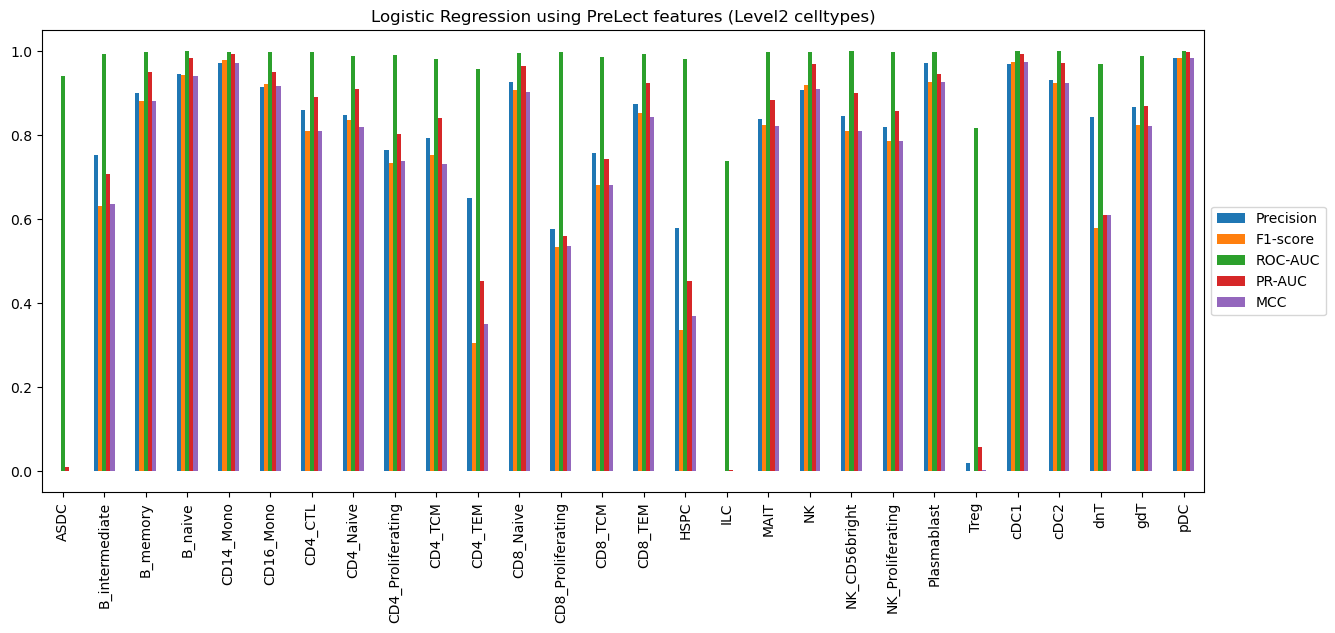

In [7]:
# Plot metrics for each celltype
cols = ['Precision', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
ax = all_metrics[cols].plot.bar(rot=90, figsize=(15,6), title='Logistic Regression using PreLect features (Level2 celltypes)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


## Plot DEGn metrics

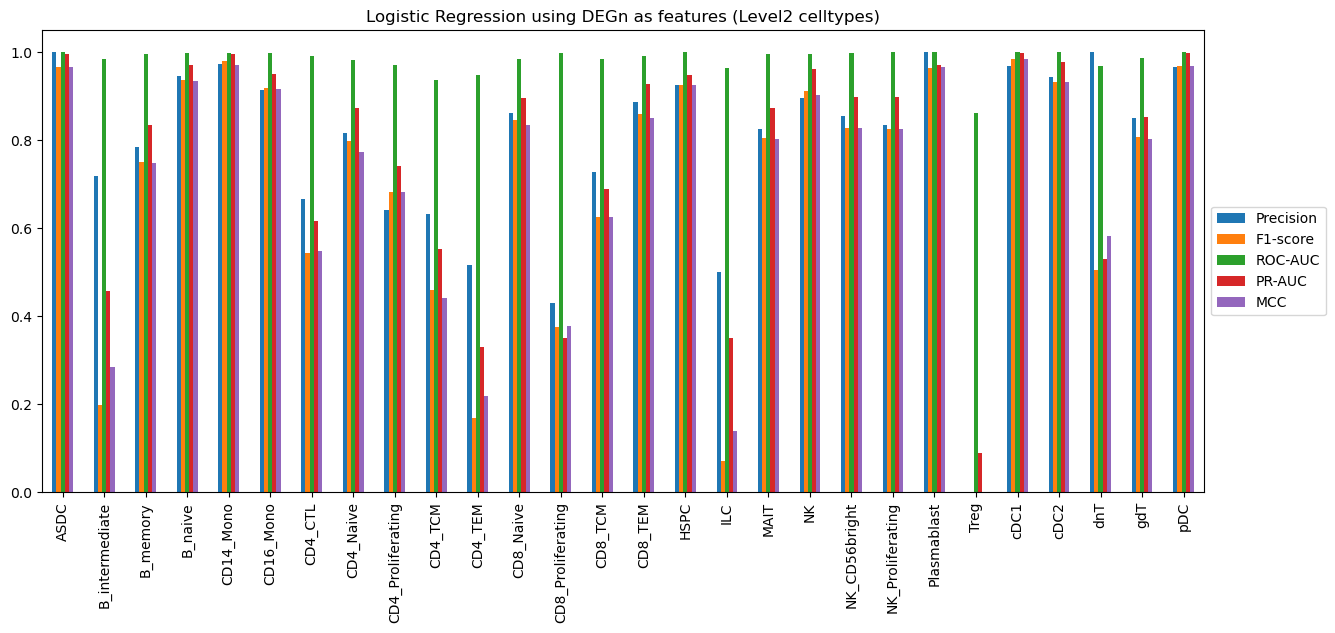

In [8]:
# Plot metrics for each celltype
cols = ['Precision', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
ax = all_metrics_DEG[cols].plot.bar(rot=90, figsize=(15,6), title='Logistic Regression using DEGn as features (Level2 celltypes)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Plot PreLect - DEGn

In [9]:
AD_minus_DEG = all_metrics - all_metrics_DEG
AD_minus_DEG

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,-4.821838e-04,-1.000000,-0.933333,-0.965517,-6.061109e-02,-0.986761,-0.966186
B_intermediate,4.395203e-03,0.033365,0.429806,0.431729,9.620254e-03,0.250615,0.350511
B_memory,5.019595e-03,0.117305,0.143379,0.130892,3.671025e-03,0.116460,0.133161
B_naive,5.934175e-04,-0.001555,0.015139,0.006774,1.751869e-04,0.010750,0.007094
CD14_Mono,-7.528536e-08,0.000408,-0.000422,-0.000008,8.292130e-05,-0.001282,-0.000006
CD16_Mono,1.483326e-04,0.001355,0.003956,0.002331,8.371100e-05,0.000076,0.002584
CD4_CTL,4.438515e-03,0.193748,0.311398,0.267766,6.793767e-03,0.273983,0.262286
CD4_Naive,7.603450e-03,0.032577,0.049703,0.039757,5.211442e-03,0.037461,0.044829
CD4_Proliferating,1.174524e-04,0.123386,-0.003463,0.052024,2.128187e-02,0.061312,0.056006
CD4_TCM,3.419133e-02,0.161650,0.361631,0.291717,4.424254e-02,0.286642,0.291311


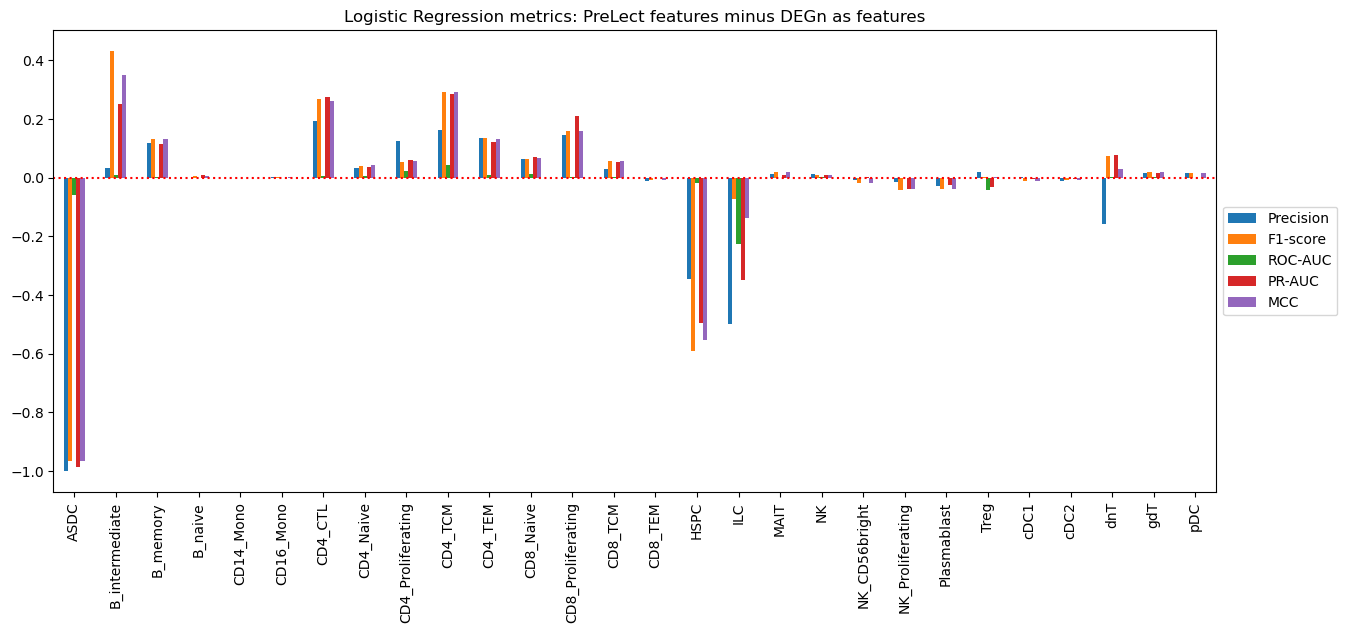

In [10]:
# Plot metrics for each celltype
cols = ['Precision', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
ax = AD_minus_DEG[cols].plot.bar(rot=90, figsize=(15,6), title='Logistic Regression metrics: PreLect features minus DEGn as features')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Add vertical red dotted line at y = 0
ax.axhline(y=0, color='red', linestyle='dotted')
